(60000, 28, 28)
[5 0 4 ... 5 6 8]


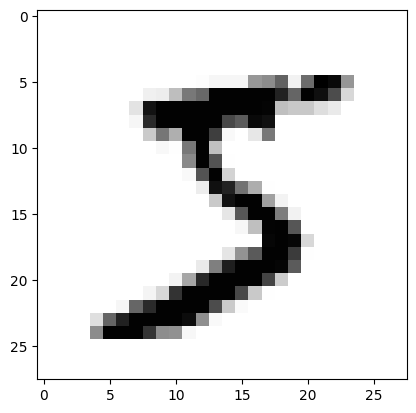

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels),(test_images, test_labels)=tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels)
plt.imshow(train_images[0], cmap="Greys")


In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])


In [8]:
train_images = train_images.reshape((60000, 784))	# 28x28
train_images = train_images.astype('float32') / 255.0 # (0,1) 값으로

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [21]:
# 콜백 함수들 정의
callbacks = [
    # 학습률 조정
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,  # 학습률을 50%씩 감소
        patience=2,   # 2 에포크 동안 개선이 없으면 학습률 감소
        min_lr=0.00001
    ),
    
    # 조기 종료
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=3,   # 3 에포크 동안 개선이 없으면 학습 중단
        restore_best_weights=True  # 최적 가중치 저장
    ),
    
    # 모델 체크포인트 저장
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='loss',
        save_best_only=True,
        mode='min'
    )
]

# 모델 학습
history = model.fit(
    train_images, 
    train_labels,
    epochs=10,          # 에포크 수 증가
    batch_size=64,      # 배치 사이즈 감소
    validation_split=0.2,  # 20%를 검증 데이터로 사용
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0032 - accuracy: 0.9852 - val_loss: 0.0037 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 2/10
 34/750 [>.............................] - ETA: 3s - loss: 0.0028 - accuracy: 0.9903

/home/rmaurmau/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 3s 5ms/step - loss: 0.0030 - accuracy: 0.9869 - val_loss: 0.0036 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9878 - val_loss: 0.0035 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9890 - val_loss: 0.0034 - val_accuracy: 0.9831 - lr: 0.0010
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0023 - accuracy: 0.9898 - val_loss: 0.0035 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 0.9906 - val_loss: 0.0034 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0020 - accuracy: 0.9912 - val_loss: 0.0034 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 8/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0019 

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


 99/313 [========>.....................] - ETA: 0s - loss: 0.0046 - accuracy: 0.9747

313/313 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9821
테스트 정확도: 0.9821000099182129


Epoch 1/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0015 - accuracy: 0.9938 - val_loss: 0.0032 - val_accuracy: 0.9847
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.9938 - val_loss: 0.0032 - val_accuracy: 0.9848
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.9941 - val_loss: 0.0032 - val_accuracy: 0.9845
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9941 - val_loss: 0.0032 - val_accuracy: 0.9847
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9944 - val_loss: 0.0032 - val_accuracy: 0.9841


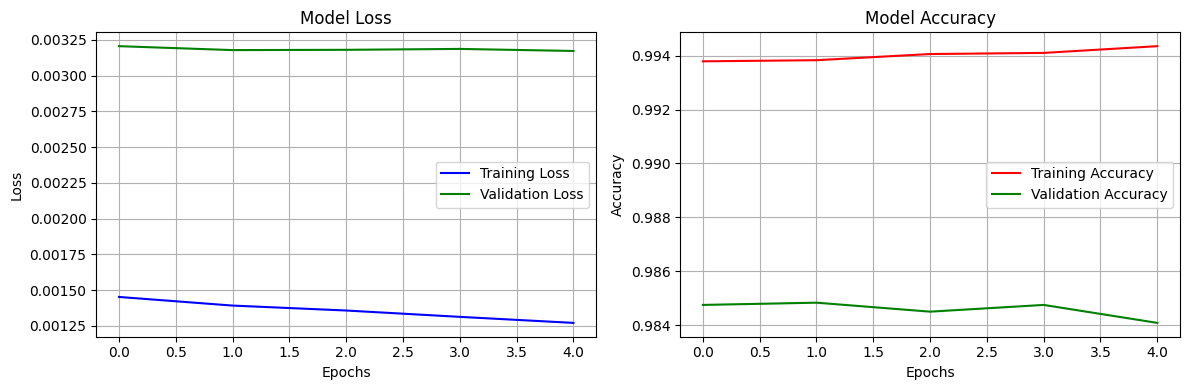

In [23]:
# 모델 학습 시 검증 데이터 추가
history = model.fit(train_images, train_labels, 
                   epochs=5, 
                   batch_size=128,
                   validation_split=0.2)  # 20%를 검증 데이터로 사용

# 그래프 그리기
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'g', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

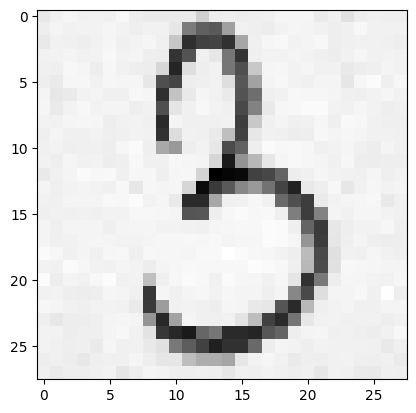

In [28]:
import cv2 as cv

image = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()


In [30]:
# 예측 결과를 더 자세히 보기
pred = model.predict(image, batch_size=1)
predicted_digit = pred.argmax()
confidence = pred[0][predicted_digit] * 100

print(f"추정된 숫자: {predicted_digit}")
print(f"신뢰도: {confidence:.2f}%")
print("\n각 숫자별 확률:")
for i in range(10):
    print(f"숫자 {i}: {pred[0][i]*100:.2f}%")

1/1 [==============================] - 0s 25ms/step
추정된 숫자: 8
신뢰도: 85.20%

각 숫자별 확률:
숫자 0: 0.01%
숫자 1: 0.00%
숫자 2: 0.01%
숫자 3: 15.99%
숫자 4: 0.00%
숫자 5: 0.99%
숫자 6: 0.01%
숫자 7: 0.00%
숫자 8: 85.20%
숫자 9: 0.03%
